[toc]

# XGBoost importance与特征选择

XGBoost 可以输出 feature importance, 我们可以根据输出的 importance 来进行变量选择，保留 importance 比较大的特征。

## XGBoost 中的 importance 

在 XGBoost 中，有五种 importance 的度量。

*   weight：该特征被选为分裂特征的次数。
*   gain：该特征的带来平均增益(有多棵树)。在tree中用到时的gain之和/在tree中用到的次数计数。gain = total\_gain / weight
*   cover：该特征对每棵树的覆盖率。
*   total\_gain：在所有树中，某特征在每次分裂节点时带来的总增益
*   total\_cover：在所有树中，某特征在每次分裂节点时处理(覆盖)的所有样例的数量。

这里的 total_cover 是比较难理解的，理解了 total_cover，cover 也就是对 total_cover 求平均而已。某个特征的 total_cover 是指用该 feature 来进行划分的样本的个数。说起来比较拗口，举个例子就好了。如下面的例子：

![](https://gitee.com/EdwardElric_1683260718/picture_bed/raw/master/img/20200719194459.png)

上图左侧是构建的树。右侧是5个样本。

特征 $x_1$ 用于对第一个节点的分裂，由于第一个节点有 5 个样本，因此覆盖率就是 5；特征 $x_2$ 用于对第二、第三个节点分裂，第二个节点有处有三个样本，第三个节点处有2两个样本，因此覆盖率为 2 + 3 = 5。这两个值相当于 xgb 中的 total_cover。

## 绘制 importance

先使用波士顿房价数据来简单得训练一个 xgboost 的模型

In [2]:
from sklearn.datasets import load_boston
import xgboost as xgb
boston = load_boston()
X = boston['data']
y = boston['target']

dtrain = xgb.DMatrix(X, y)
params = {"objective": "reg:squarederror"}
num_round = 10
watchlist = [(dtrain, "train")]
bst = xgb.train(params, dtrain, num_round, watchlist)

[0]	train-rmse:17.05901
[1]	train-rmse:12.26369
[2]	train-rmse:8.93115
[3]	train-rmse:6.57217
[4]	train-rmse:4.90731
[5]	train-rmse:3.73352
[6]	train-rmse:2.91234
[7]	train-rmse:2.36294
[8]	train-rmse:1.95365
[9]	train-rmse:1.68487


使用 bst.get_score 来得到每个特征的重要性

In [4]:
bst.get_score() # default: importance_type="weight"

{'f12': 37,
 'f5': 38,
 'f7': 39,
 'f0': 47,
 'f11': 14,
 'f4': 19,
 'f6': 22,
 'f2': 7,
 'f10': 16,
 'f9': 13,
 'f8': 3,
 'f1': 4,
 'f3': 1}

In [6]:
bst.get_score(importance_type="gain")

{'f12': 1032.8092584802705,
 'f5': 571.2864699083946,
 'f7': 76.43502765589744,
 'f0': 48.25634968244955,
 'f11': 18.317264846842857,
 'f4': 94.16696530105263,
 'f6': 14.30023395195455,
 'f2': 33.501922601428575,
 'f10': 44.3060116795625,
 'f9': 39.002794723076924,
 'f8': 18.615451806666666,
 'f1': 2.482800185,
 'f3': 10.4870834}

使用 xgboost.plot_importance 来绘制重要性的图。

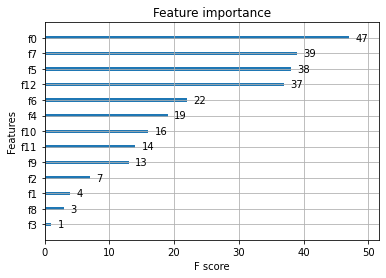

In [8]:
from xgboost import plot_importance

plot_importance(bst)  # 默认 importance_type="weight"

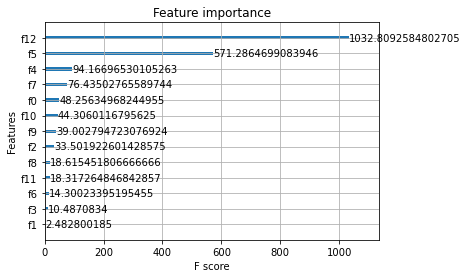

In [9]:
plot_importance(bst, importance_type="gain")  # 使用 gain 来衡量

# References
1. [(2条消息)xgboost特征重要性指标: weight, gain, cover_sujinhehehe的博客-CSDN博客_xgboost weight](https://blog.csdn.net/sujinhehehe/article/details/84201415)
2. [Python API Reference — xgboost 1.2.0-SNAPSHOT documentation](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.Booster.get_score)